<a href="https://colab.research.google.com/github/jpandersen61/MySQLNotebooks/blob/main/North_Wind_Database_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#North Wind Database

Denne opgave forudsætter viden og færdigheder, som tidligere er tilgnet i faget "Data-og IT-forståelse":
*   Datamodellering og ER-Diagrammer: Du skal specificere ændringer til den database, som du kommer til at arbejde med i opgaven.
*   Databaseforespørgsel: Der vil især blive fokuseret på SQL JOIN opererationer, som trækker data ud fra flere databasetabeller på én gang.
*   Præsentation af data og resultater: Du kommer til anvende, hvad du har lært om præsentation i tabelform og plots.
*   Deskriptiv statistik: Middelværdier, standardafvigelser m.m.
*   Datastrukturen i et forretningsmæssigt perspektiv: Kritisk stillingtagen om er hensigtmæssig i forhold til de forretningsprocesser, som den skal understøtte.








##Databasebeskrivelse

I denne opgave gøres der brug af [North Wind database](https://en.wikiversity.org/wiki/Database_Examples/Northwind/MySQL), som er en eksempel database, der i sin tid blev lanceret af Microsoft. Databasens er indhold er opdigtet, men den er OK til formålet, idet den afspejler, hvad er kunne være en virksomheds produkt-og ordredatabase. Databasen er implementeret i en MySQL database, der ligger i skyen hos Simply.com. ER-diagrammet for databasen i 'crow foot' notation er vist herunder:

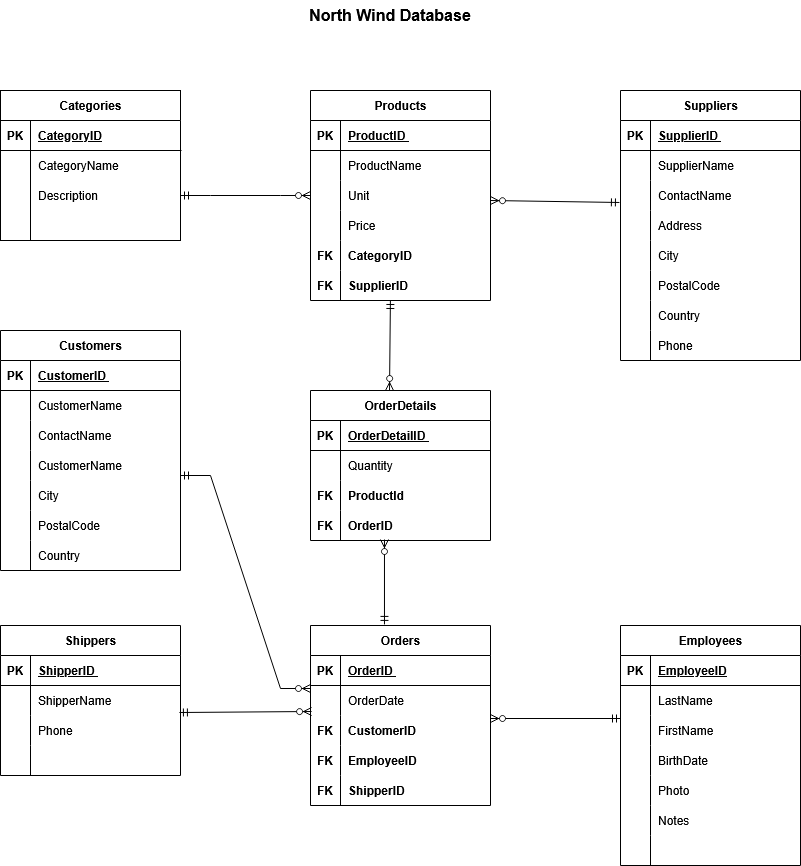

##Installér nødvendige komponenter og indfør diverse opsætninger

In [1]:

pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 38.1 MB/s eta 0:00:00


In [2]:
#Import needed components
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#Suppress warnings for this purpose
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Connect to MySQL database
mydb = mysql.connector.connect(
  host="mysql15.unoeuro.com",
  user="jean_zealand_dk",
  password="n25hwtBx9mcEdbar3RGy",
  database="jean_zealand_dk_db"
)

##Tilgå de enkelte tabeller

I denne del af opgaven beskæftiger vi os med udtræk af databasen vha. SQL, der kun vedrører én tabel af gangen på formen `SELECT attrubutliste FROM tabel` - f.eks. `SELECT * FROM Categories`, der udtrækker hele `Categories` tabellen. `*` angiver som bekendt alle attributter. Opret kodecelle til hvert udtræk vha. *+ Code*

###Operationer på enkel tabeller

**Opgaver**:

1.   Udtræk hele `Categories` tabellen (lavet på forhånd)
2.   Udtræk hele `Shippers` tabellen


1.   Udtræk hele `Employees` tabellen, men begrænset til attributterne `EmployeeID, LastName, FirstName` og `BirthDate`. Sorter udtrækket alfabetisk efter efternavn og derunder fornavn. Hint: Brug `ORDER BY `






**Løsning**: 1. Udtræk hele Categories tabellen

In [5]:
query = """
SELECT * FROM Categories
"""
query_result = pd.read_sql(query,mydb)
query_result

,CategoryID,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


**Løsning**: 2. Udtræk hele Shippers tabellen

In [6]:
query = """
SELECT * FROM Shippers
"""
query_result = pd.read_sql(query,mydb)
query_result

,ShipperID,ShipperName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


**Løsning:** 3 Udtræk hele Employees tabellen, men begrænset til attributterne EmployeeID, LastName, FirstName og BirthDate. Sorter udtrækket alfabetisk efter...

In [7]:
query = """
SELECT EmployeeID, LastName, FirstName, BirthDate FROM Employees
ORDER BY LastName, FirstName
"""
query_result = pd.read_sql(query,mydb)
query_result

,EmployeeID,LastName,FirstName,BirthDate
0,5,Buchanan,Steven,1955-03-04
1,8,Callahan,Laura,1958-01-09
2,1,Davolio,Nancy,1968-12-08
3,9,Dodsworth,Anne,1969-07-02
4,2,Fuller,Andrew,1952-02-19
5,7,King,Robert,1960-05-29
6,3,Leverling,Janet,1963-08-30
7,4,Peacock,Margaret,1958-09-19
8,6,Suyama,Michael,1963-07-02
9,10,West,Adam,1928-09-19


###Fordelinger & Bar charts

Denne gruppe af opgaver omhandler udtræk af én tabel af gangen med efterfølgende visning af hyppighedsfordelinger i bar charts.

**Opgaver**:


1.   Lav et udtræk af `Customers` tabellen: Alle rækker skal være med og `Country` attributten skal også være med. Lav herefter en celle med Python-kode, der genererer et bar chart med fordelinger af hyppigheder af kunder pr. land - som vist i eksemplet  herunder.
2.   Etabler også en kodeceller, der genererer et tilsvarende diagram for leverandører. Dvs. at du skal starte med et udtræk af `Suppliers` tabellen.


1.   Lav et tilsvarende udtræk af `Orders`. `OrderDate` skal være med i udtrækket. Generer et bar chart diagram, der har antallet af ordrer fordelt på måneder.
Hint: Tilføj månedsangivelse til din `DataFrame` vha. `query_result['OrderMonth'] = query_result['OrderDate'].dt.to_period('M')`






Eksempel på bar chart diagram:



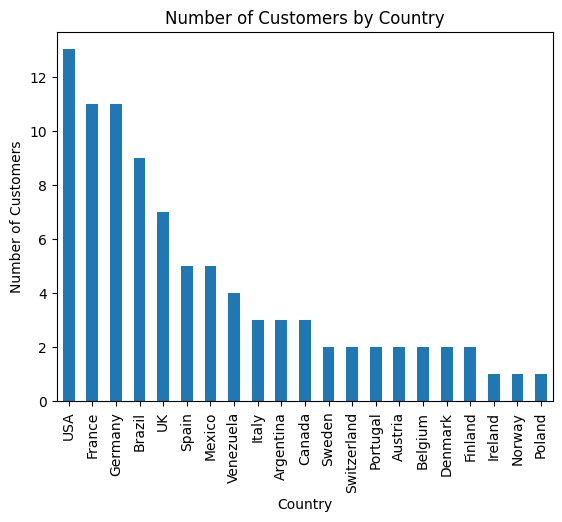

**Løsning**: 1. Lav et udtræk af Customers tabellen: Alle rækker skal være med og Country attributten skal også være med. Lav herefter en celle med Python-kode, der genererer et bar chart...

In [8]:
query = "SELECT * FROM Customers"
query_result = pd.read_sql(query,mydb)
query_result

,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
1,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constitución 2222,México D.F.,5021,Mexico
2,3,Antonio Moreno Taquería,Antonio Moreno,Mataderos 2312,México D.F.,5023,Mexico
3,4,Around the Horn,Thomas Hardy,120 Hanover Sq.,London,WA1 1DP,UK
4,5,Berglunds snabbköp,Christina Berglund,Berguvsvägen 8,Luleå,S-958 22,Sweden
...,...,...,...,...,...,...,...
86,87,Wartian Herkku,Pirkko Koskitalo,Torikatu 38,Oulu,90110,Finland
87,88,Wellington Importadora,Paula Parente,"Rua do Mercado, 12",Resende,08737-363,Brazil
88,89,White Clover Markets,Karl Jablonski,305 - 14th Ave. S. Suite 3B,Seattle,98128,USA
89,90,Wilman Kala,Matti Karttunen,Keskuskatu 45,Helsinki,21240,Finland


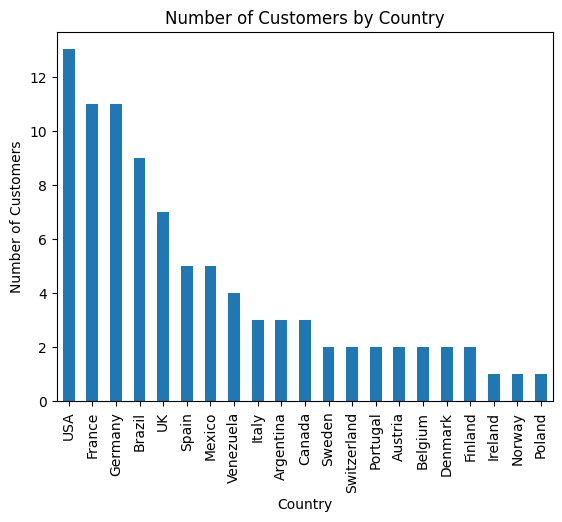

In [9]:
{
    query_result['Country']
    .value_counts()
    .plot(kind='bar',
          title='Number of Customers by Country',
          xlabel='Country',
          ylabel='Number of Customers')
};

**Løsning**: 2. Etabler også en kodeceller, der genererer et tilsvarende diagram for leverandører. Dvs. at du skal starte med et udtræk af Suppliers tabellen.

In [10]:
query = "SELECT * FROM Suppliers"
query_result = pd.read_sql(query,mydb)
query_result

,SupplierID,SupplierName,ContactName,Address,City,PostalCode,Country,Phone
0,1,Exotic Liquid,Charlotte Cooper,49 Gilbert St.,Londona,EC1 4SD,UK,(171) 555-2222
1,2,New Orleans Cajun Delights,Shelley Burke,P.O. Box 78934,New Orleans,70117,USA,(100) 555-4822
2,3,Grandma Kelly's Homestead,Regina Murphy,707 Oxford Rd.,Ann Arbor,48104,USA,(313) 555-5735
3,4,Tokyo Traders,Yoshi Nagase,9-8 Sekimai Musashino-shi,Tokyo,100,Japan,(03) 3555-5011
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Calle del Rosal 4,Oviedo,33007,Spain,(98) 598 76 54
5,6,Mayumi's,Mayumi Ohno,92 Setsuko Chuo-ku,Osaka,545,Japan,(06) 431-7877
6,7,"Pavlova, Ltd.",Ian Devling,74 Rose St. Moonie Ponds,Melbourne,3058,Australia,(03) 444-2343
7,8,"Specialty Biscuits, Ltd.",Peter Wilson,29 King's Way,Manchester,M14 GSD,UK,(161) 555-4448
8,9,PB Knäckebröd AB,Lars Peterson,Kaloadagatan 13,Göteborg,S-345 67,Sweden,031-987 65 43
9,10,Refrescos Americanas LTDA,Carlos Diaz,Av. das Americanas 12.890,São Paulo,5442,Brazil,(11) 555 4640


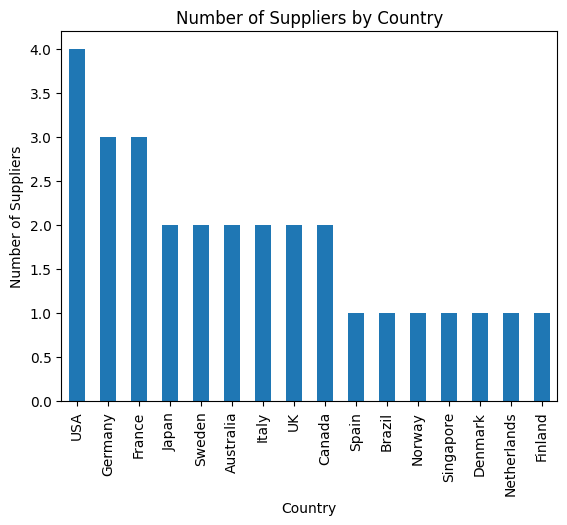

In [11]:
{
    query_result['Country']
    .value_counts()
    .plot(kind='bar',
          title='Number of Suppliers by Country',
          xlabel='Country',
          ylabel='Number of Suppliers')
};

**Løsning**: 3. Lav et tilsvarende udtræk af Orders. OrderDate skal være med i udtrækket. Generer et bar chart diagram, der har antallet af ordrer fordelt på måneder....

In [12]:
query = """
SELECT OrderDate, MONTH(OrderDate) AS Month, YEAR(OrderDate) AS Year FROM Orders
ORDER BY Year, Month
"""
query_result = pd.read_sql(query,mydb)
query_result['OrderMonth'] = query_result['OrderDate'].dt.to_period('M')
query_result

,OrderDate,Month,Year,OrderMonth
0,1996-07-04,7,1996,1996-07
1,1996-07-05,7,1996,1996-07
2,1996-07-08,7,1996,1996-07
3,1996-07-08,7,1996,1996-07
4,1996-07-09,7,1996,1996-07
...,...,...,...,...
191,1997-02-07,2,1997,1997-02
192,1997-02-10,2,1997,1997-02
193,1997-02-10,2,1997,1997-02
194,1997-02-11,2,1997,1997-02


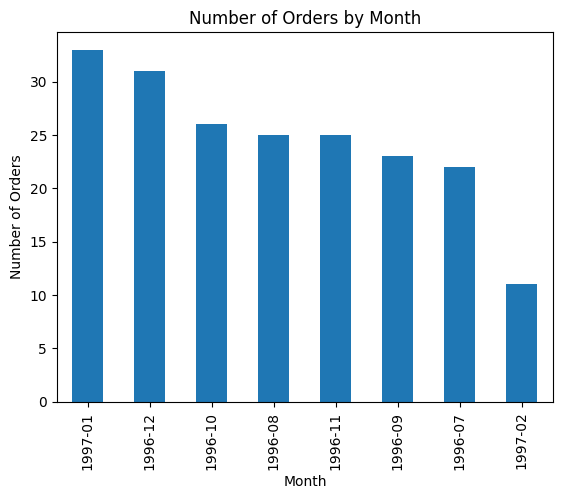

In [13]:
{
    query_result['OrderMonth']
    .value_counts()
    .plot(kind='bar',
          title='Number of Orders by Month',
          xlabel='Month',
          ylabel='Number of Orders')
};

###Frekvenser, histogrammer og fordelinger

Denne gruppe af opgaver omhandler udtræk af én tabel af gangen med efterfølgende visning af hyppighedsfordelinger i histogrammer.

**Opgaver**:


1.   Lav et udtræk af `Products` tabellen: Alle rækker skal være med og `Price` attibutten skal også være med. Lav herefter en celle med Python-kode, der genererer et histogram med fordelinger af prisintervallernes hyppigheder, som vist i eksemplet herunder.
2.   Lav herefter en kodecelle, hvor `describe()` metoden bliver kaldt på `Price` attributen - f.eks. `query_result[["Price"]].describe()`
1.   Forklar i en tekstcelle, hvad vi kan udlede af den information, som `describe()` metoden returnerer.
1.   Gentag ovenstående 3 trin, men nu med `OrderDetails` tabellen og med histogram på `Quantity` attributten.









Eksempel på histogram:

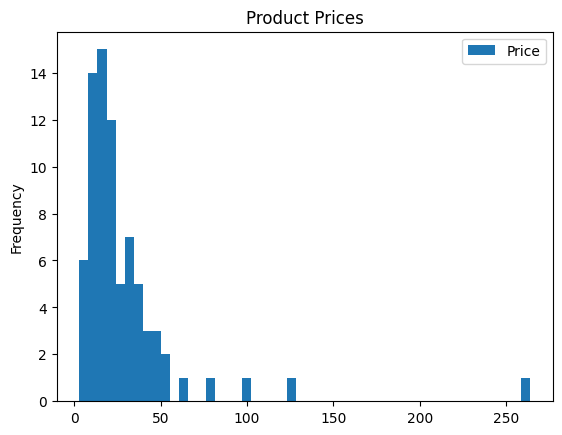

**Løsning**: 1. Lav et udtræk af Products tabellen: Alle rækker skal være med og Price attibutten skal også være med. Lav herefter ...

In [14]:
query = "SELECT * FROM Products"
query_result = pd.read_sql(query,mydb)
query_result

,ProductID,ProductName,SupplierID,CategoryID,Unit,Price
0,1,Chais,1,1,10 boxes x 20 bags,18.0
1,2,Chang,1,1,24 - 12 oz bottles,19.0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.0
...,...,...,...,...,...,...
72,73,Röd Kaviar,17,8,24 - 150 g jars,15.0
73,74,Longlife Tofu,4,7,5 kg pkg.,10.0
74,75,Rhönbräu Klosterbier,12,1,24 - 0.5 l bottles,8.0
75,76,Lakkalikööri,23,1,500 ml,18.0


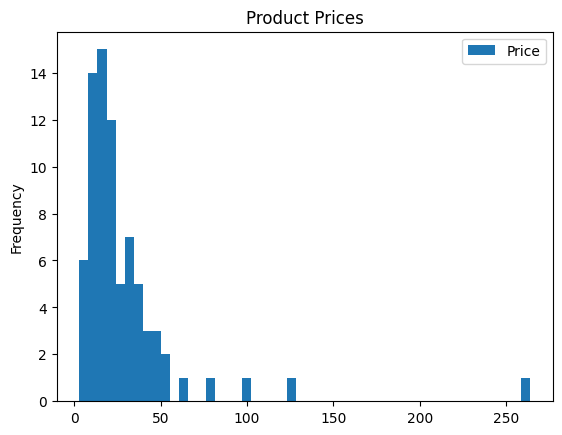

In [15]:
{
    query_result[['Price']]
    .plot(
        title='Product Prices',
        kind="hist",
        bins=50)
};

**Løsning**: 2. Lav herefter en kodecelle, hvor describe() metoden bliver kaldt på Price attributen ...

In [16]:
query_result[["Price"]].describe()

,Price
count,77.000000
mean,28.922078
std,33.856418
min,3.000000
25%,13.000000
50%,20.000000
75%,33.000000
max,264.000000


**Svar**: 3. Forklar i en tekstcelle, hvad vi kan udlede af den information, som describe() metoden returnerer.

Vi kan bl.a. se følgene: Gennemsnitsprisen på et produkter omkring 29. 50 % af produkterne ligger prismæssigt indenfor 13 0g 33.

In [17]:
query = "SELECT * FROM OrderDetails"
query_result = pd.read_sql(query,mydb)
query_result

,OrderDetailID,OrderID,ProductID,Quantity
0,1,10248,11,12
1,2,10248,42,10
2,3,10248,72,5
3,4,10249,14,9
4,5,10249,51,40
...,...,...,...,...
513,514,10442,11,30
514,515,10442,54,80
515,516,10442,66,60
516,517,10443,11,6


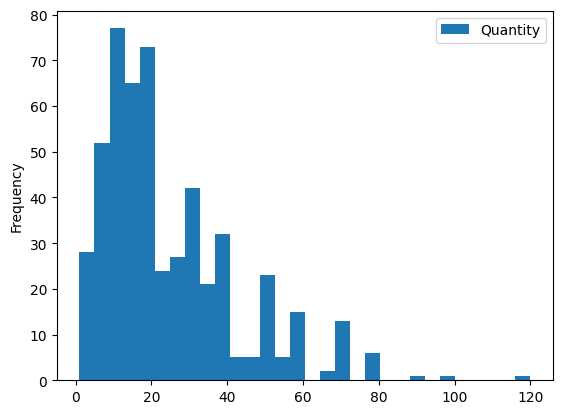

In [18]:
{
    query_result[["Quantity"]]
    .plot(
        kind="hist",
        bins=30)
};

In [19]:
query_result[["Quantity"]].describe()

,Quantity
count,518.000000
mean,24.600386
std,18.376899
min,1.000000
25%,10.000000
50%,20.000000
75%,32.750000
max,120.000000


##Relationer mellem tabeller

I denne del af opgaven beskæftiger vi os med:

*   Udtræk af databasen vha. SQL JOIN, der vedrører 2 tabeller af gangen på formen `SELECT attrubutliste FROM tabel JOIN ...`
*   Krydstabuleringer
*   samt scatter plots og korellation










###SQL Join: Categories - Products

**Opgaver**:


1.   Lav et samlet udtræk på `Categories` og `Products` tabellerne ved at lave en `JOIN` på deres fælles `CategoryID` som er henholdsvis primary key (PK) og foreing key (FK) i de 2 tabeller (vist herunder).
2.   Forklar i en tekst celle, hvad udtrækket viser.



**Løsning:** 1. Lav et samlet udtræk på Categories og Products tabellerne ved at lave en JOIN på deres fælles CategoryID...

In [20]:
query = """
SELECT CategoryName,ProductName,Unit,Price
FROM Categories
JOIN Products ON Categories.CategoryID=Products.CategoryID
"""
query_result = pd.read_sql(query,mydb)
query_result

,CategoryName,ProductName,Unit,Price
0,Beverages,Chais,10 boxes x 20 bags,18.0
1,Beverages,Chang,24 - 12 oz bottles,19.0
2,Beverages,Guaraná Fantástica,12 - 355 ml cans,5.0
3,Beverages,Sasquatch Ale,24 - 12 oz bottles,14.0
4,Beverages,Steeleye Stout,24 - 12 oz bottles,18.0
...,...,...,...,...
72,Seafood,Jack's New England Clam Chowder,12 - 12 oz cans,10.0
73,Seafood,Røgede sild,1k pkg.,10.0
74,Seafood,Spegesild,4 - 450 g glasses,12.0
75,Seafood,Escargots de Bourgogne,24 pieces,13.0


**Svar**: 2. Forklar i en tekst celle, hvad udtrækket viser.

Viser indholdet af *Products* tabellen med tilhørende oplysninger fra *Categories* tabellen. Det er kun den specificerede delmængde af attributterne, der vises.

###SQL JOIN: Suppliers - Products

**Opgaver**:

1.   Lav et samlet udtræk på `Suppliers` og `Products` tabellerne ved at lave en `JOIN` på deres fælles nøgleattribut. Begræns udtrækket til attributterne `ProductName,Unit,Price,SupplierName`
2.   Forklar i en tekst celle, hvad udtrækket viser.

**Løsning:** 1. Lav et samlet udtræk på Suppliers og Products tabellerne ved at lave en JOIN på deres fælles nøgleattribut.

In [21]:
query = """SELECT ProductName,Unit,Price,SupplierName
FROM Suppliers
JOIN Products ON Suppliers.SupplierID=Products.SupplierID ;"""
query_result = pd.read_sql(query,mydb)
query_result

,ProductName,Unit,Price,SupplierName
0,Chais,10 boxes x 20 bags,18.0,Exotic Liquid
1,Chang,24 - 12 oz bottles,19.0,Exotic Liquid
2,Aniseed Syrup,12 - 550 ml bottles,10.0,Exotic Liquid
3,Chef Anton's Cajun Seasoning,48 - 6 oz jars,22.0,New Orleans Cajun Delights
4,Chef Anton's Gumbo Mix,36 boxes,21.0,New Orleans Cajun Delights
...,...,...,...,...
72,Escargots de Bourgogne,24 pieces,13.0,Escargots Nouveaux
73,Raclette Courdavault,5 kg pkg.,55.0,Gai pâturage
74,Camembert Pierrot,15 - 300 g rounds,34.0,Gai pâturage
75,Sirop d'érable,24 - 500 ml bottles,29.0,Forêts d'érables


**Svar**: 2. Forklar i en tekst celle, hvad udtrækket viser.

Viser indholdet af *Products* tabellen med tilhørende oplysninger fra *Suppliers* tabellen. Det er kun den specificerede delmængde af attributterne, der vises.

###SQL JOIN: Orders - OrderDetails

**Opgaver**:

1.   Lav et samlet udtræk på `Orders` og `OrderDetails` tabellerne ved at lave en `JOIN` på deres fælles nøgleattribut.
2.   Forklar i en tekst celle, hvad udtrækket viser.

**Løsning**: 1. Lav et samlet udtræk på Orders og OrderDetails tabellerne ved at lave en JOIN...

In [22]:
query = """
SELECT *
FROM Orders
JOIN OrderDetails ON Orders.OrderID=OrderDetails.OrderID
"""
query_result = pd.read_sql(query,mydb)
query_result

,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID,OrderDetailID,OrderID,ProductID,Quantity
0,10248,90,5,1996-07-04,3,1,10248,11,12
1,10248,90,5,1996-07-04,3,2,10248,42,10
2,10248,90,5,1996-07-04,3,3,10248,72,5
3,10249,81,6,1996-07-05,1,4,10249,14,9
4,10249,81,6,1996-07-05,1,5,10249,51,40
...,...,...,...,...,...,...,...,...,...
513,10442,20,3,1997-02-11,2,514,10442,11,30
514,10442,20,3,1997-02-11,2,515,10442,54,80
515,10442,20,3,1997-02-11,2,516,10442,66,60
516,10443,66,8,1997-02-12,1,517,10443,11,6


**Svar**: 2. Forklar i en tekst celle, hvad udtrækket viser.

Viser indholdet af *OrderDetails* tabellen med tilhørende oplysninger fra *Orders* tabellen. Alle oplysninger er med fra begge tabeller.

###Krydstabulering: Customers - Orders

**Opgaver**:

1.   Lav et samlet udtræk på `Orders` og `Customers` tabellerne ved at lave en JOIN på deres fælles nøgleattribut. I udtrækket skal du som minimum have attributten `Country` og den beregnede attribut `YEAR(OrderDate) AS Year` med.
2.   Lav en krydstabullering på `Country` og `Year` vha. `crosstab(...)` metoden
1.   Forklar i en tekst celle, hvad krydstabuleringen viser.





    



**Løsning**: 1. Lav et samlet udtræk på Orders og OrderDetails tabellerne ved at lave en JOIN på deres fælles nøgleattribut....

In [23]:
query = """
SELECT Customers.CustomerID, CustomerName, Country, OrderID, OrderDate, MONTH(OrderDate) AS Month, YEAR(OrderDate) AS Year
FROM Customers
JOIN Orders ON Customers.CustomerID=Orders.CustomerID
ORDER BY OrderDate
"""
query_result = pd.read_sql(query,mydb)
query_result

,CustomerID,CustomerName,Country,OrderID,OrderDate,Month,Year
0,90,Wilman Kala,Finland,10248,1996-07-04,7,1996
1,81,Tradição Hipermercados,Brazil,10249,1996-07-05,7,1996
2,34,Hanari Carnes,Brazil,10250,1996-07-08,7,1996
3,84,Victuailles en stock,France,10251,1996-07-08,7,1996
4,76,Suprêmes délices,Belgium,10252,1996-07-09,7,1996
...,...,...,...,...,...,...,...
191,51,Mère Paillarde,Canada,10439,1997-02-07,2,1997
192,71,Save-a-lot Markets,USA,10440,1997-02-10,2,1997
193,55,Old World Delicatessen,USA,10441,1997-02-10,2,1997
194,20,Ernst Handel,Austria,10442,1997-02-11,2,1997


**Løsning**: 2. Lav en krydstabullering på Country og Year vha. crosstab(...) metoden

In [24]:
pd.crosstab(query_result['Country'],query_result['Year'])

Year,1996,1997
Country,,
Argentina,0,1
Austria,8,5
Belgium,2,0
Brazil,14,5
Canada,4,5
Denmark,3,1
Finland,5,3
France,14,4
Germany,22,3


**Svar**: 3. Forklar i en tekst celle, hvad krydstabuleringen viser.

Viser fordelingen af ordrer i antal på de enkelte lande i årene 1996 og 1997

###Krydstabulering: Shippers - Orders

**Opgaver**:

1.   Lav et samlet udtræk på `Shippers` og `Orders` tabellerne ved at lave en JOIN på deres fælles nøgleattribut. I udtrækket skal du som minimum have atttributten `ShipperName` og den beregnede attribut `YEAR(OrderDate) AS Year`
2.   Lav en krydstabullering på `ShipperName` og `Year` vha. `crosstab(...)` metoden
1.   Forklar i en tekst celle, hvad krydstabuleringen viser.

**Løsning**: 1: Lav et samlet udtræk på Shippers og Orders tabellerne ved at lave en JOIN på deres fælles nøgleattribut...

In [25]:
query = """SELECT Shippers.ShipperID, ShipperName, OrderID, OrderDate, YEAR(OrderDate) AS Year
FROM Shippers
JOIN Orders ON Shippers.ShipperID=Orders.ShipperID
ORDER BY ShipperID, OrderDate
;"""
query_result = pd.read_sql(query,mydb)
query_result

,ShipperID,ShipperName,OrderID,OrderDate,Year
0,1,Speedy Express,10249,1996-07-05,1996
1,1,Speedy Express,10251,1996-07-08,1996
2,1,Speedy Express,10258,1996-07-17,1996
3,1,Speedy Express,10260,1996-07-19,1996
4,1,Speedy Express,10265,1996-07-25,1996
...,...,...,...,...,...
191,3,Federal Shipping,10416,1997-01-16,1997
192,3,Federal Shipping,10417,1997-01-16,1997
193,3,Federal Shipping,10423,1997-01-23,1997
194,3,Federal Shipping,10433,1997-02-03,1997


**Løsning:** 2. Lav en krydstabullering på ShipperName og Year vha. crosstab(...) metoden

In [26]:
pd.crosstab(query_result['ShipperName'],query_result['Year'])

Year,1996,1997
ShipperName,,
Federal Shipping,58,10
Speedy Express,38,16
United Package,56,18


**Svar:** 3. Forklar i en tekst celle, hvad krydstabuleringen viser.

Viser hvor mange ordrer de enkelte befragterer (shipper) har håndteret i  årene 1996 og 1997

###Krydstabulering: Employees - Orders

**Opgaver**:

1.   Lav et samlet udtræk på `Employees` og `Orders` tabellerne ved at lave en JOIN på deres fælles nøgleattribut. I udtrækket skal du som minimum have atttributten `FirstName` samt de beregnede attribututer `MONTH(OrderDate) AS Month` og `YEAR(OrderDate) AS Year`. Begræns udtrækket til et enkelt år (`Year`)
2.   Lav en krydstabullering på `FirstName` og `Month` vha. `crosstab(...)` metoden
1.   Forklar i en tekst celle, hvad krydstabuleringen viser.

**Løsning**: Lav et samlet udtræk på Employees og Orders tabellerne ved at lave en JOIN på deres fælles nøgleattribut

In [27]:
query = """
SELECT Employees.EmployeeID, LastName, FirstName, OrderID, OrderDate, MONTH(OrderDate) AS Month, YEAR(OrderDate) AS Year
FROM Employees
JOIN Orders ON Orders.EmployeeID=Employees.EmployeeID
WHERE YEAR(OrderDate)=1996
;"""
query_result = pd.read_sql(query,mydb)
query_result




,EmployeeID,LastName,FirstName,OrderID,OrderDate,Month,Year
0,1,Davolio,Nancy,10258,1996-07-17,7,1996
1,1,Davolio,Nancy,10270,1996-08-01,8,1996
2,1,Davolio,Nancy,10275,1996-08-07,8,1996
3,1,Davolio,Nancy,10285,1996-08-20,8,1996
4,1,Davolio,Nancy,10292,1996-08-28,8,1996
...,...,...,...,...,...,...,...
147,9,Dodsworth,Anne,10255,1996-07-12,7,1996
148,9,Dodsworth,Anne,10263,1996-07-23,7,1996
149,9,Dodsworth,Anne,10324,1996-10-08,10,1996
150,9,Dodsworth,Anne,10331,1996-10-16,10,1996


**Løsning**: 2. Lav en krydstabullering på FirstName og Month vha. crosstab(...) metoden

In [28]:
pd.crosstab(query_result['FirstName'],query_result['Month'])

Month,7,8,9,10,11,12
FirstName,,,,,,
Andrew,1,2,5,2,2,4
Anne,2,0,0,2,0,1
Janet,4,2,1,3,4,4
Laura,2,6,3,2,2,4
Margaret,7,5,3,8,5,3
Michael,2,4,3,0,3,3
Nancy,1,5,5,2,4,9
Robert,0,1,2,5,3,0
Steven,3,0,1,2,2,3


**Svar**: 3. Forklar i en tekst celle, hvad krydstabuleringen viser.

Viser mange ordrer den enkelte medarbejder har håndteret i de enkelte måneder i 1996

###Scatter plots & Korrelation: Products - OrderDetails



**Opgaver**:

1.   Lav et samlet udtræk på `OrderDetails` og `Products` tabellerne ved at lave en `JOIN` på deres fælles nøgleattribut. I udtrækket skal du som minimum have attributterne `Quantity` og `Price` samt den beregnede attribut `(Price * Quantity) AS Revenue`. Sidstnævnte er omsætningen på en konkret fakturalinie i en ordre.
2.   Lav et scatter plot på udtrækket med `scatter_matrix(...)` metoden
1.   Beregn korrellations koefficienterne med `corr(...)` metoden  
2.   Konkluder på scatter plottet og korrellationenerne i en tekst celle.





    
   


**Løsning**: 1. Lav et samlet udtræk på OrderDetails og Products tabellerne...

In [29]:
query = """
SELECT Quantity, Price, (Price * Quantity) AS Revenue
FROM OrderDetails
JOIN Products ON Products.ProductID=OrderDetails.ProductID
ORDER BY OrderDetails.ProductID
;"""

query_result = pd.read_sql(query,mydb)
query_result

,Quantity,Price,Revenue
0,45,18.0,810.0
1,18,18.0,324.0
2,20,18.0,360.0
3,15,18.0,270.0
4,12,18.0,216.0
...,...,...,...
513,5,13.0,65.0
514,7,13.0,91.0
515,14,13.0,182.0
516,35,13.0,455.0


In [30]:
#Testing: Total revenue should the for all revenue queries
revenue_total=query_result['Revenue'].sum()
print(revenue_total)

387066.0


**Løsning**: Lav et scatter plot på udtrækket med scatter_matrix(...) metoden

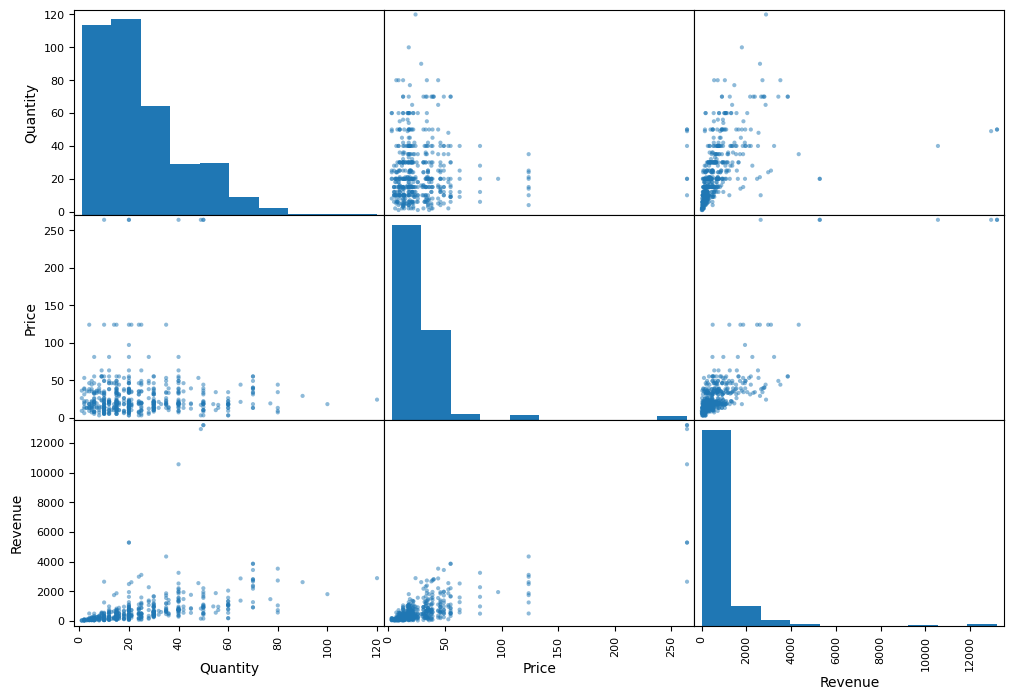

In [31]:
from pandas.plotting import scatter_matrix
scatter_matrix(query_result, figsize=(12, 8))
plt.show();

**Løsning:** 3. Beregn korrellations koefficienterne med corr(...) metoden

In [32]:
corr_matrix = query_result.corr(numeric_only=True)
corr_matrix

,Quantity,Price,Revenue
Quantity,1.000000,0.043728,0.435748
Price,0.043728,1.000000,0.806098
Revenue,0.435748,0.806098,1.000000


**Svar:** 4. Beregn korrellations koefficienterne med corr(...) metoden

Pris og omsætning er forholdsvis kraftigt korrelleret med hinanden, hvilket nok ikke er overraskende.

##Omsætning

Denne del af opgaverne er bygget op omkring tabellerne `OrderDetails` og  `Products`, hvorfra omsætningen på den enkelte ordrelinie kan beregnes: `Price*Quantity`. Men du skal have flere tabeller `JOIN`'et på for at løse opgaverne.

###Omsætning pr. kategori

**Opgaver**:

1.   Lav et udtræk, der viser omsætning pr. kategori (løsning vist herunder)
2.   Generer det tilsvarende bar chart (løsning vist herunder)



**Løsning 1**: Lav et udtræk, der viser omsætning pr. kategori

In [33]:
query = """
SELECT Categories.CategoryID, CategoryName ,Sum(Price*Quantity) AS Revenue
FROM OrderDetails
JOIN Products ON Products.ProductID=OrderDetails.ProductID
JOIN Categories ON Categories.CategoryID=Products.CategoryID
GROUP BY Products.CategoryID
ORDER BY Products.CategoryID
;"""
query_result = pd.read_sql(query,mydb)
query_result

,CategoryID,CategoryName,Revenue
0,1,Beverages,99699.0
1,2,Condiments,35024.0
2,3,Confections,54729.0
3,4,Dairy Products,70530.0
4,5,Grains/Cereals,22370.0
5,6,Meat/Poultry,51636.0
6,7,Produce,23439.0
7,8,Seafood,29639.0


In [34]:
#Testing: Total revenue should the for all revenue queries
revenue_total=query_result['Revenue'].sum()
print(revenue_total)

387066.0


**Løsning:** 2. Generer det tilsvarende bar chart

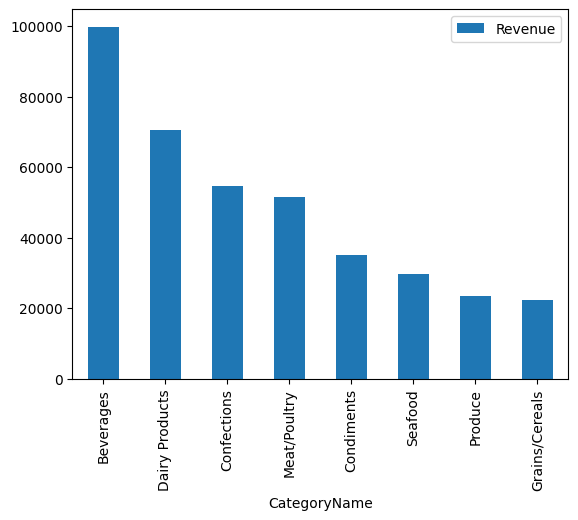

In [35]:
{
    query_result
    .sort_values('Revenue', ascending=False)
    .plot(kind='bar', x='CategoryName', y='Revenue')
};

###Omsætning pr. leverandør

**Opgaver**:

1.   Lav et udtræk, der viser omsætning pr. leverandør
2.   Generer det tilsvarende bar chart



    
    



**Løsning:** 1. Lav et udtræk, der viser omsætning pr. leverandør

In [36]:
query = """
SELECT Suppliers.SupplierID, SupplierName ,Sum(Price*Quantity) AS Revenue
FROM OrderDetails
JOIN Products ON Products.ProductID=OrderDetails.ProductID
JOIN Suppliers ON Suppliers.SupplierID=Products.SupplierID
GROUP BY Products.SupplierID
ORDER BY Products.SupplierID
;"""
query_result = pd.read_sql(query,mydb)
query_result

,SupplierID,SupplierName,Revenue
0,1,Exotic Liquid,10141.0
1,2,New Orleans Cajun Delights,10268.0
2,3,Grandma Kelly's Homestead,7250.0
3,4,Tokyo Traders,6435.0
4,5,Cooperativa de Quesos 'Las Cabras',4848.0
5,6,Mayumi's,4448.0
6,7,"Pavlova, Ltd.",36989.0
7,8,"Specialty Biscuits, Ltd.",14272.0
8,9,PB Knäckebröd AB,1863.0
9,10,Refrescos Americanas LTDA,790.0


In [37]:
#Testing: Total revenue should the for all revenue queries
revenue_total=query_result['Revenue'].sum()
print(revenue_total)

387066.0


**Løsning**: 2. Generer det tilsvarende bar chart

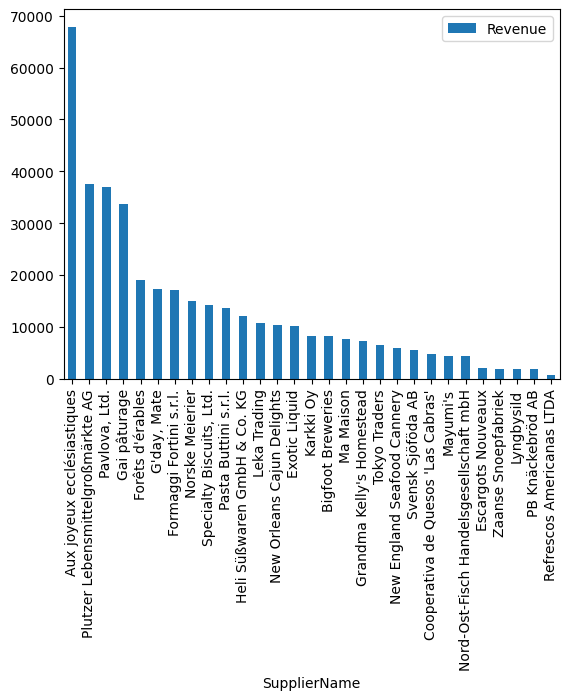

In [38]:
{
    query_result
    .sort_values('Revenue', ascending=False)
    .plot(kind='bar', x='SupplierName', y='Revenue')
};

###Omsætning pr. kunde

**Opgaver**:
1.   Lav et udtræk, der viser omsætning pr. kunde

**Løsning:** 1. Lav et udtræk, der viser omsætning pr. kunde

In [39]:
query = """
SELECT Customers.CustomerID, CustomerName ,Sum(Price*Quantity) AS Revenue
FROM Customers
JOIN Orders ON Customers.CustomerID=Orders.CustomerID
JOIN OrderDetails ON Orders.OrderID=OrderDetails.OrderID
JOIN Products ON Products.ProductID=OrderDetails.ProductID
GROUP BY Customers.CustomerID
ORDER BY Revenue DESC
"""
query_result = pd.read_sql(query,mydb)
query_result

,CustomerID,CustomerName,Revenue
0,20,Ernst Handel,35630.0
1,51,Mère Paillarde,23434.0
2,71,Save-a-lot Markets,22516.0
3,65,Rattlesnake Canyon Grocery,18442.0
4,63,QUICK-Stop,18171.0
...,...,...,...
69,54,Océano Atlántico Ltda.,396.0
70,18,Du monde entier,336.0
71,13,Centro comercial Moctezuma,126.0
72,2,Ana Trujillo Emparedados y helados,111.0


In [40]:
#Testing: Total revenue should the for all revenue queries
revenue_total=query_result['Revenue'].sum()
print(revenue_total)

387066.0


###Omsætning pr. medarbejder

**Opgaver**:
1.   Lav et udtræk, der viser omsætning pr. medarbejder
2.   Generer det tilsvarende bar chart

**Løsning:** 1. Lav et udtræk, der viser omsætning pr. medarbejder

In [41]:
query = """
SELECT Employees.EmployeeID, FirstName ,Sum(Price*Quantity) AS Revenue
FROM Employees
JOIN Orders ON Employees.EmployeeID=Orders.EmployeeID
JOIN OrderDetails ON Orders.OrderID=OrderDetails.OrderID
JOIN Products ON Products.ProductID=OrderDetails.ProductID
GROUP BY Employees.EmployeeID
ORDER BY Revenue DESC
;"""
query_result = pd.read_sql(query,mydb)
query_result

,EmployeeID,FirstName,Revenue
0,4,Margaret,105926.0
1,1,Nancy,57765.0
2,3,Janet,42823.0
3,7,Robert,39843.0
4,8,Laura,39341.0
5,2,Andrew,32559.0
6,5,Steven,27606.0
7,6,Michael,25501.0
8,9,Anne,15702.0


In [42]:
#Testing: Total revenue should the for all revenue queries
revenue_total=query_result['Revenue'].sum()
print(revenue_total)

387066.0


**Løsning:** 2. Generer det tilsvarende bar chart

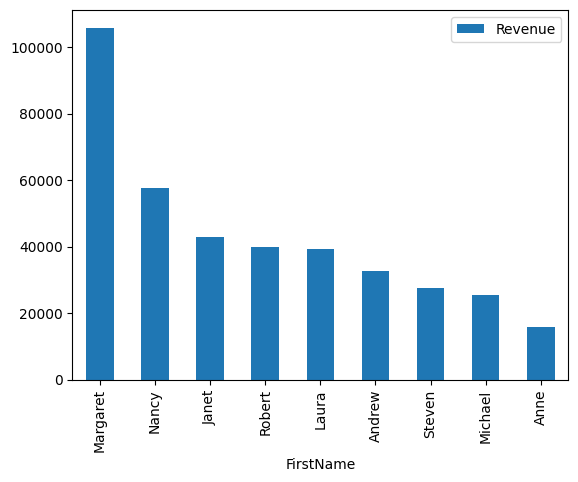

In [43]:
{
    query_result
    #.sort_values('Revenue', ascending=False)
    .plot(kind='bar', x='FirstName', y='Revenue')
};

###Omsætning pr. produkt

**Opgaver:**
1.   Lav et udtræk, der viser omsætning pr. produkt

**Løsning:** 1. Lav et udtræk, der viser omsætning pr. produkt

In [44]:
query = """
SELECT CategoryID, OrderID, Products.ProductID, ProductName, Quantity, Price, Sum(Price*Quantity) AS Revenue
FROM OrderDetails
JOIN Products ON Products.ProductID=OrderDetails.ProductID
GROUP BY Products.ProductID
ORDER BY Products.ProductID
"""
query_result = pd.read_sql(query,mydb)
query_result


,CategoryID,OrderID,ProductID,ProductName,Quantity,Price,Revenue
0,1,10285,1,Chais,45,18.0,2862.0
1,1,10255,2,Chang,20,19.0,6479.0
2,2,10289,3,Aniseed Syrup,30,10.0,800.0
3,2,10309,4,Chef Anton's Cajun Seasoning,20,22.0,2354.0
4,2,10258,5,Chef Anton's Gumbo Mix,65,21.0,2709.0
...,...,...,...,...,...,...,...
72,8,10278,73,Röd Kaviar,25,15.0,675.0
73,7,10254,74,Longlife Tofu,21,10.0,1860.0
74,1,10280,75,Rhönbräu Klosterbier,30,8.0,1152.0
75,1,10267,76,Lakkalikööri,15,18.0,3564.0


In [45]:
#Testing: Total revenue should the for all revenue queries
revenue_total=query_result['Revenue'].sum()
print(revenue_total)

387066.0


###Omsætning pr. måned

**Opgaver**:
1.   Lav et udtræk, der viser omsætning pr. måned
2.   Generer det tilsvarende bar chart

**Løsning:** 1. Lav et udtræk, der viser omsætning pr. måned

In [46]:
query = """
SELECT Orders.OrderID, OrderDate, OrderDetailID, Products.ProductID,Price, Quantity, Sum(Price*Quantity) AS Revenue, MONTH(OrderDate) AS Month, YEAR(OrderDate) AS Year
FROM Orders
JOIN OrderDetails ON Orders.OrderID=OrderDetails.OrderID
JOIN Products ON Products.ProductID=OrderDetails.ProductID
GROUP BY Year, Month
ORDER BY Year, Month
;"""
query_result = pd.read_sql(query,mydb)
query_result

,OrderID,OrderDate,OrderDetailID,ProductID,Price,Quantity,Revenue,Month,Year
0,10255,1996-07-12,21,2,19.0,20,37826.0,7,1996
1,10285,1996-08-20,100,1,18.0,45,33304.0,8,1996
2,10317,1996-09-30,185,1,18.0,20,34545.0,9,1996
3,10327,1996-10-11,210,2,19.0,25,51672.0,10,1996
4,10348,1996-11-07,270,1,18.0,15,62202.0,11,1996
5,10370,1996-12-03,327,1,18.0,15,63971.0,12,1996
6,10406,1997-01-07,421,1,18.0,10,83566.0,1,1997
7,10435,1997-02-04,494,2,19.0,10,19980.0,2,1997


In [47]:
#Testing: Total revenue should the for all revenue queries
revenue_total=query_result['Revenue'].sum()
print(revenue_total)

387066.0


**Løsning:** 2. Generer det tilsvarende bar chart

In [48]:
query_result['OrderMonth'] = query_result['OrderDate'].dt.to_period('M')
query_result

,OrderID,OrderDate,OrderDetailID,ProductID,Price,Quantity,Revenue,Month,Year,OrderMonth
0,10255,1996-07-12,21,2,19.0,20,37826.0,7,1996,1996-07
1,10285,1996-08-20,100,1,18.0,45,33304.0,8,1996,1996-08
2,10317,1996-09-30,185,1,18.0,20,34545.0,9,1996,1996-09
3,10327,1996-10-11,210,2,19.0,25,51672.0,10,1996,1996-10
4,10348,1996-11-07,270,1,18.0,15,62202.0,11,1996,1996-11
5,10370,1996-12-03,327,1,18.0,15,63971.0,12,1996,1996-12
6,10406,1997-01-07,421,1,18.0,10,83566.0,1,1997,1997-01
7,10435,1997-02-04,494,2,19.0,10,19980.0,2,1997,1997-02


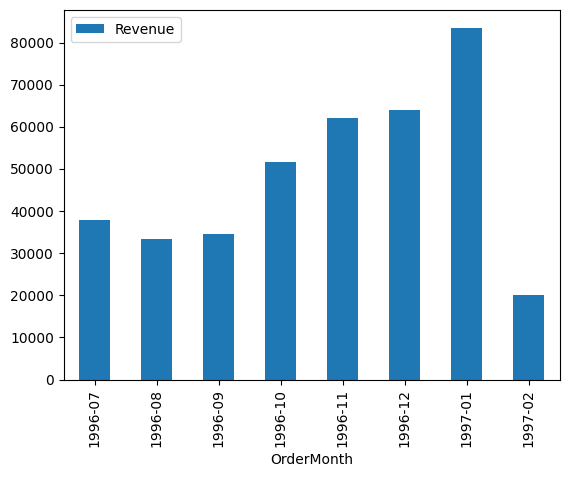

In [49]:
{
    query_result.plot(
        kind='bar',
        x='OrderMonth',
        y='Revenue')
};

###Omsætningsfordeling pr. måned på kategorier

**Opgaver**:
1.   Lav et udtræk, der viser omsætning pr. kunde
2.   Generer det tilsvarende pie chart, der viser fordelingen

Hint: [How to create pie chart from pandas dataframe/](https://www.geeksforgeeks.org/python/how-to-create-pie-chart-from-pandas-dataframe/)

**Løsning:** 1. Lav et udtræk, der viser omsætning pr. kunde

In [50]:
query = """
SELECT Categories.CategoryID, CategoryName, Orders.OrderID,  OrderDetailID, Products.ProductID,Price, Quantity, Sum(Price*Quantity) AS Revenue, MONTH(OrderDate) AS Month, YEAR(OrderDate) AS Year
FROM Orders
JOIN OrderDetails ON Orders.OrderID=OrderDetails.OrderID
JOIN Products ON Products.ProductID=OrderDetails.ProductID
JOIN Categories ON Products.CategoryID=Categories.CategoryID
GROUP BY Categories.CategoryID, Year, Month
"""
query_result = pd.read_sql(query,mydb)
query_result

,CategoryID,CategoryName,OrderID,OrderDetailID,ProductID,Price,Quantity,Revenue,Month,Year
0,1,Beverages,10285,100,1,18.0,45,6326.0,8,1996
1,1,Beverages,10317,185,1,18.0,20,6417.0,9,1996
2,1,Beverages,10348,270,1,18.0,15,24707.0,11,1996
3,1,Beverages,10370,327,1,18.0,15,14745.0,12,1996
4,1,Beverages,10406,421,1,18.0,10,30330.0,1,1997
...,...,...,...,...,...,...,...,...,...,...
59,8,Seafood,10325,203,13,6.0,12,8298.0,10,1996
60,8,Seafood,10420,461,13,6.0,2,2585.0,1,1997
61,8,Seafood,10305,154,18,63.0,25,4213.0,9,1996
62,8,Seafood,10263,46,30,26.0,60,3471.0,7,1996


In [51]:
#Testing: Total revenue should the for all revenue queries
revenue_total=query_result['Revenue'].sum()
print(revenue_total)

387066.0


**Løsning:** 2. Generer det tilsvarende pie chart, der viser fordelingen

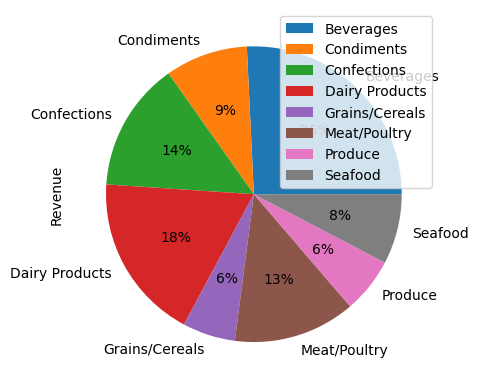

In [52]:
{
    query_result
    .groupby('CategoryName')
    .sum()
    .plot(
        kind='pie',
        y='Revenue',
        autopct='%1.0f%%')
};

##Database struktur

**Opgaver**:



1.   Forklar database-strukturen.
1.   Lever database-strukturen jf. ER-diagrammet op til de forretningsmæssige behov, som du forestiller dig det?
2.   Redefiner database-strukturen/ER-diagrammet, så flere medarbejderer kan være involveret i en ordre.
1.   Er det hensigsmæssigt, at den pris (Price), der angives i en ordre (OrderDetails) er defineret via prisen for produktet (Products)?






###Svar: 1. Forklar databasestrukturen

Databasen har følgende tabeller:
*   En *Products* tabel, der indeholder listen af produkter, som virksomheden sælger. Hver enkelt produkt er beskrevet med attributterne *ProductName*, *Unit* og *Price*.
*   En *Categories* tabel, der beskriver de kategorier af produkter som føres. Databasen er udformet således, at hvert produkt kan tilhøre én og kun én kategori: Altså ingen produkter uden for kategori.  
*   En *Suppliers* tabel, der beskriver de leverandører af produkter som føres. Databasen er udformet således, at hvert produkt kan have én og kun én leverandør: Mon det er en korrekt datamæssig modellering af hvad der sker i forretningen?
*   En *OrderDetails* tabel, der beskriver et antal - *Quantity* - af et givet produkt i en ordre. Et produkt kan således indgå i flere ordrer med et givet antal. *OrderDetails* tabellen danner grundlag for ordrelinierne i en ordre.
*   En *Orders* tabel, der indeholder oplysninger om ordrer. Den enkelte ordre er beskrevet med attributten *OrderDate* og en én-til-mange relation til *OrderDetails*: En ordre kan have flere ordrelinier/detaljer.      
*   En *Customers* tabel med kundeoplysninger. En kunde kan have bestilt ingen eller flere ordrer.
*   En *Shippers* tabel, som indeholder oplysninger om benyttede befragtere. Hver af disse kan håndtere ingen eller flere ordrer. En ordre kan have én og kun én shipper tilknyttet, hvilket måske kan kritiseres, idet en ordre vel skal kunne oprettes uden, at der er en shipper tilknyttet.
*   En *Employees* tabel, der nok indeholder listen af medarbejderer. Hver medarbejder kan håndtere ingen eller flere ordrer. Det fremgår ikke, hvilken rolle medarbejderen spiller i forhold til ordren, hvilket måske er et problem?







### Svar: 2. Lever database-strukturen jf. ER-diagrammet op til de forretningsmæssige behov?

Er blevet problematiseret i svar på 1

###Svar: 3. Redefiner database-strukturen/ER-diagrammet, så flere medarbejderer kan være involveret i en ordre.

Der indføres en mange-til-mange relation mellem tabellerne *Orders* og *Employees*, som implementeres vha. "samlingstabellen" *EmployeesOrders*. Attributten *Role* er tilføjet til denne, så det kan angives hviklen rolle, den aktuelle medarbejder spiller i forhold til ordren - f.eks. "Ordreansvarlig", "Pakker", "Sælger" eller noget andet.

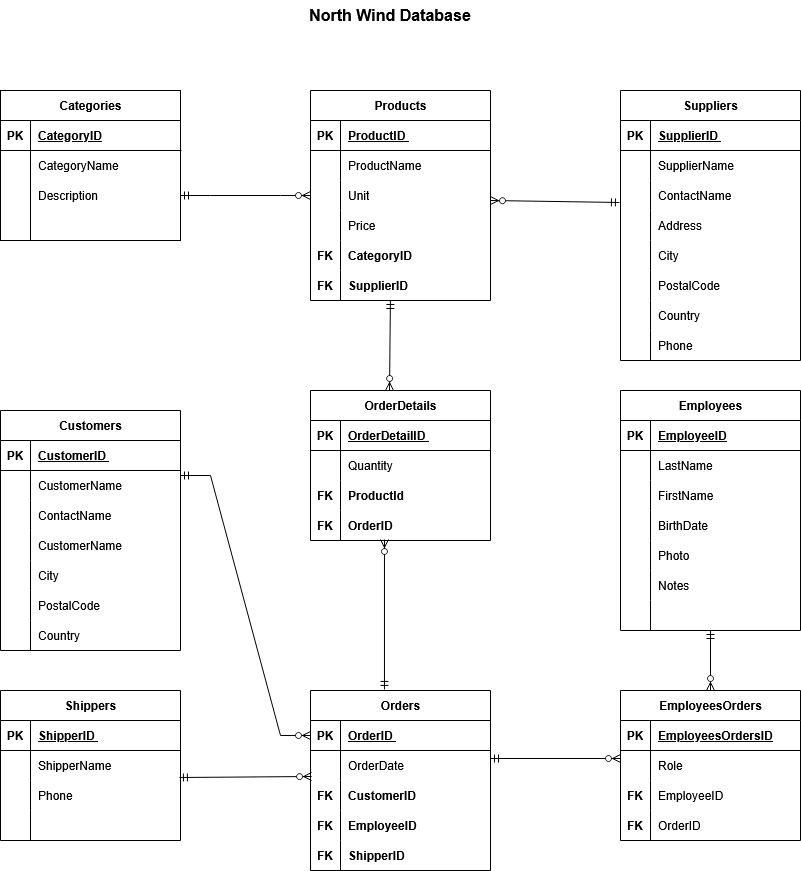

###Svar: 4. Er det hensigsmæssigt, at den pris (Price), der angives i en ordre (OrderDetails) er defineret via prisen for produktet (Products)?

Nej, det er nok ikke hensigtmæssigt, fordi det så ikke er muligt at aftale en specifik pris med kunden på en given ordre. Løsningen kunne defor være at indføre en Price attribut på *OrderDetails*